# PLOTS
## CIS 3203N GROUP 3  

**Thesis Partner 1:** Dejito, Christine Ann  
**Thesis Partner 2:** Roca, Zophia Maureen  
**Date:** February 10, 2025  

---

## Instructions
- Use the same font and font size for all graphs.
- Collate the separate graphs into **one single image** for printing.
- Ensure the collated image is **clearly visible** when pasted on a long bond paper.

---

## Deadline
- **Monday, February 10, 2025, at 2:00 PM.**

---

## Deliverables
1. Python code.
2. `.png` files of each graph.
3. `.png` file of the collated graphs.
4. A sample of the collated file pasted into a document, saved as a `.pdf` file.
5. Push everything to your GitHub account.

---

## Code Implementation

### (a) Bar Graph
- Create a horizontal stacked bar chart.
- Transform `1` into **"Yes"** and `0` into **"No"**.
- Follow the plot specifications for the bar plot.

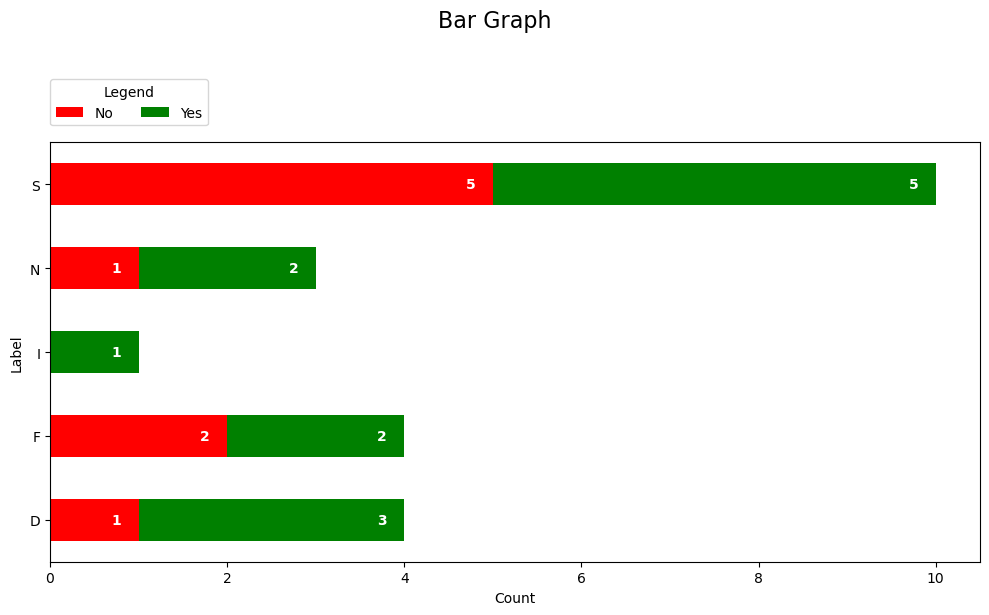

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from CSV
df = pd.read_csv('./data/bar_assignment.csv')

# Ensure correct column names
expected_columns = ['LABEL', 'COUNT']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"CSV file must contain the columns: {expected_columns}")

# Replace 1 with 'Yes' and 0 with 'No'
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by LABEL and COUNT, and get the count of each
grouped = df.groupby(['LABEL', 'COUNT']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = grouped.plot(kind='barh', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Annotating individual counts for each section, aligned to the right
for i, (label, counts) in enumerate(grouped.iterrows()):
    yes_count = counts['Yes']
    no_count = counts['No']
    
    # Add individual counts for the red (No) section, right-aligned
    if no_count > 0:
        ax.text(no_count - 0.2, i, f'{no_count}', va='center', ha='right', color='white', fontweight='bold')
    
    # Add individual counts for the green (Yes) section, right-aligned
    if yes_count > 0:
        ax.text(yes_count + no_count - 0.2, i, f'{yes_count}', va='center', ha='right', color='white', fontweight='bold')

# Customizing the plot
plt.suptitle("Bar Graph", fontsize=16, ha='center', va='bottom')  # Title above the plot
plt.xlabel("Count")
plt.ylabel("Label")
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(0, 1.15), borderaxespad=0., ncol=2)
plt.tight_layout()

# Display the plot
plt.show()

### (b) Sankey Diagram
- Create a Sankey Diagram that connects ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS') to the LABELS to ('Reg', 'Aca', 'Oth')
- Follow the Path Specifications

ValueError: RGBA sequence should have length 3 or 4

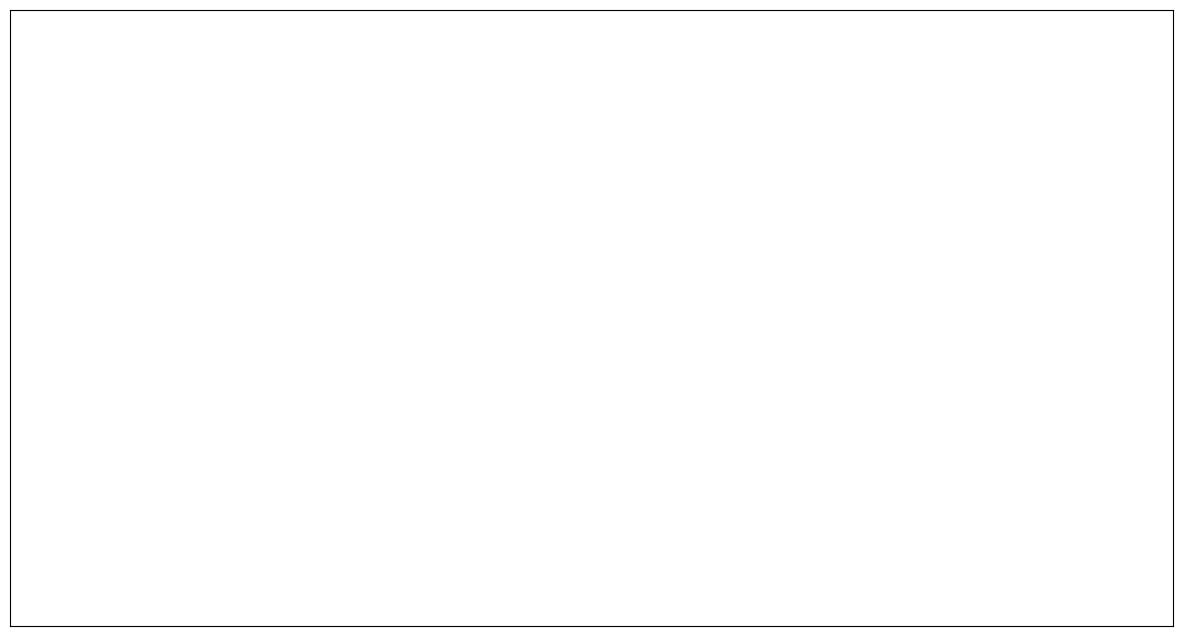

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import matplotlib.colors as mcolors

# Read the CSV file
df = pd.read_csv('./data/sankey_assignment.csv')

# Define the columns for left and right sides
left_cols = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
right_cols = ['Reg', 'Aca', 'Oth']
labels = df['LABEL'].unique()

# Create flows matrix
flows = []
labels_list = []
pathlengths = []

# Convert hex colors to RGBA
colors = [
    mcolors.to_rgba('#8dd3c7'),
    mcolors.to_rgba('#fb8072'),
    mcolors.to_rgba('#80b1d3'),
    mcolors.to_rgba('#fdb462'),
    mcolors.to_rgba('#b3de69'),
    mcolors.to_rgba('#fccde5'),
    mcolors.to_rgba('#d9d9d9'),
    mcolors.to_rgba('#bc80bd')
]

# Process each label
for idx, label in enumerate(labels):
    label_data = df[df['LABEL'] == label]
    
    # Add flows from left columns
    for i, col in enumerate(left_cols):
        value = label_data[col].iloc[0]
        if value > 0:
            flows.append(value)
            labels_list.append(left_cols[i])
            pathlengths.append(0.25)

# Create figure
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

# Initialize Sankey diagram
sankey = Sankey(ax=ax, scale=0.1, offset=0.2, head_angle=180,
                format='%.0f', unit='')

# Add diagram
sankey.add(flows=flows,
           labels=labels_list,
           pathlengths=pathlengths,
           orientations=[0] * len(flows),
           patchlabel=None,
           facecolor=colors[:len(flows)],  # Make sure we don't exceed the number of flows
           alpha=0.7)

# Adjust layout
plt.title('TITLE', pad=20)
plt.tight_layout()

# Save the plot
plt.savefig('sankey_diagram.png', bbox_inches='tight', dpi=300)
plt.show()

### (c) Network Graph
- Create the network graph
- D,F,I,N,S should created as a pentagram located at the center of the graph showing connection with each other.
- The others should be outside of the the pentagram, still showing connections to other nodes.
- The node color should be:
    Blue: [D,F,I,N,S], 
    Green: ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’], 
    Yellow: ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

In [ ]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
# Ensure your CSV file is in a folder named 'data' in the same directory as this script
file_path = ('./data/networks_assignment.csv')
net_data = pd.read_csv(file_path).set_index("LABELS")

# Define node groups
primary_nodes = ["A", "B", "C"]
secondary_nodes = ["D", "F", "G", "H"]
tertiary_nodes = ["I", "J", "K", "L"]

# Create the graph
G = nx.Graph()

# Add nodes with their respective colors
color_map = []
for node in net_data.index:
    if node in primary_nodes:
        color_map.append("blue")
    elif node in secondary_nodes:
        color_map.append("green")
    elif node in tertiary_nodes:
        color_map.append("yellow")
    else:
        color_map.append("gray")

G.add_nodes_from(net_data.index)

# Add edges
for label, row in net_data.iterrows():
    for node, value in row.items():
        if value > 0:
            G.add_edge(label, node, weight=value)

# Define positions for layout
pos = nx.circular_layout(G)

# Adjust specific positions (optional)
# Manually adjust node positions for better visualization if needed
custom_positions = {
    "D": [0.5, -0.5],
    "F": [-0.5, 0.5]
}
pos.update(custom_positions)

# Draw the first graph
plt.figure(figsize=(12, 6))
edges = G.edges(data=True)
edge_weights = [d['weight'] for (u, v, d) in edges]
nx.draw(G, pos, node_color=color_map, with_labels=True, edge_color=edge_weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels={(u, v): d['weight'] for u, v, d in edges},
    font_size=9
)
plt.title("Network Graph with Weighted Edges")
plt.show()

# Draw the second graph with specific edge grouping
secondary_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if u in secondary_nodes or v in secondary_nodes
]
tertiary_edges = [
    (u, v) for u, v, d in G.edges(data=True)
    if u in tertiary_nodes or v in tertiary_nodes
]

plt.figure(figsize=(12, 6))
nx.draw(
    G,
    pos,
    node_color=color_map,
    with_labels=True,
    edgelist=secondary_edges,
    edge_color="green",
    width=2
)
nx.draw(
    G,
    pos,
    edgelist=tertiary_edges,
    edge_color="yellow",
    width=2
)
plt.title("Network Graph with Secondary and Tertiary Edges Highlighted")
plt.show()
